**BUDGET SALES ANALYSIS - BUSINESS INTELLIGENCE PROJECT - INEURON**

In [ ]:
#Importing all the required library

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option("display.max_columns",None)
sns.set_style("darkgrid")

In [ ]:
# Uploading file from Mydrive

Sales = pd.read_excel(r"/content/drive/MyDrive/AdventureWorks_Database.xlsx",sheet_name= "Sales_data")
Dates = pd.read_excel(r"/content/drive/MyDrive/AdventureWorks_Database.xlsx",sheet_name= "Dates")
Customers = pd.read_excel(r"/content/drive/MyDrive/AdventureWorks_Database.xlsx",sheet_name= "Customer_info")
Products = pd.read_excel(r"/content/drive/MyDrive/AdventureWorks_Database.xlsx",sheet_name= "Product_info")
Country = pd.read_excel(r"/content/drive/MyDrive/AdventureWorks_Database.xlsx",sheet_name= "Country_info")
Budget = pd.read_excel(r"/content/drive/MyDrive/Budget.xlsx")

In [ ]:
# Extract necessay columns from each data set and convert it into single dataframe(df)

Dates.rename(columns={'Date': 'OrderDate'},inplace=True)
df3 = pd.merge(Sales,Dates[["OrderDate","Year","Quarter","Month","FiscalYear","FiscalQuarter","Weekday","WeekdayWeekend"]],on = "OrderDate" , how = "left")
df2 = pd.merge(df3,Customers[["CustomerKey","MaritalStatus",'Gender',"YearlyIncome","Education","Occupation","HouseOwnerFlag"]],on = "CustomerKey" , how = "left")
df1 = pd.merge(df2,Products[["ProductKey","ProductName",'SubCategory']],on = "ProductKey" , how = "left")
df = pd.merge(df1,Country[["SalesTerritoryKey","Region","Country","Group"]],on = "SalesTerritoryKey" , how = "left")

In [ ]:
# df Column names

df.columns

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Year', 'Quarter', 'Month', 'FiscalYear', 'FiscalQuarter',
       'Weekday', 'WeekdayWeekend', 'MaritalStatus', 'Gender', 'YearlyIncome',
       'Education', 'Occupation', 'HouseOwnerFlag', 'ProductName',
       'SubCategory', 'Region', 'Country', 'Group'],
      dtype='object')

In [ ]:
# Count of Rows and Columns

df.shape

(58189, 31)

In [ ]:
# Glimps of dataframe df

df.head(2)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,Year,Quarter,Month,FiscalYear,FiscalQuarter,Weekday,WeekdayWeekend,MaritalStatus,Gender,YearlyIncome,Education,Occupation,HouseOwnerFlag,ProductName,SubCategory,Region,Country,Group
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.135,2171.2942,3578.27,286.2616,2014,Q1,Jan,FY2014,FQ3,Wed,Weekday,S,M,70000,Bachelors,Management,1,"Road-150 Red, 62",Road Bikes,Canada,Canada,North America
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.995,1912.1544,3399.99,271.9992,2014,Q1,Jan,FY2014,FQ3,Wed,Weekday,S,F,20000,High School,Manual,0,"Mountain-100 Silver, 44",Mountain Bikes,France,France,Europe


**There are 30 features in Dataset**

1 - **Product Key:** Unique identification number of each product

2 - **OrderDate:** Date on which order was placed by the customer

3 - **ShipDate:** Date on which order was Shipped by the Retailer or Supplier

4 - **Customer key:** Unique identification number of each customer

5 - **Promotion Key:** 

6 - **Sales Territory Key:** Unique identification number given to each Territory

7 - **Sales Order Number:** unique identification number attached to every order

8 - **Sales Order Line number:** 

9 - **OrderQuantity:** Quantity ordered of specific product

10 - **UnitPrice**: Sales price of each product

11 - **Total Product Cost:** Cost required to manufacture the product 

12 - **Sales Amount:** Revenue generated by the sale of a specific product 

13 - **Tax amount:** Tax Money on sales purchase amount

14 - **Year:** Year in which the order was placed (Y - 2014,15,16)

15 - **Quarter:** Quarter of the year in which the order was placed(Q -1,2,3,4)

16 - **Month:** Month of the year in which the order was placed

17 - **Fiscal Year:** Fiscal Year in which the order was placed

18 - **Fiscal Quarter:** Fiscal Quarter in wich the order was placed

19 - **Weekday:** Week day on which the order was placed

20 - **Week day weekend:** (Sunday / Saturday )

21 - **Marital Status:** Married(M) or Single(S)

22 - **Yearly Income:** Yearly income of the customer
 
23 - **Occupation:** Main Occupation of the customer

24 - **Product Name:** Name of the product

25 - **Subcategory:** Category under which the products falls

26 - **Region:** Region from where the order was placed

27 - **Country:** Country from where the order was placed

28 - **Group:** Continent specific orders

29 - **Education** Highest Qualification of the customer who ordered the Product

30 - **HouseOwnerFlag** It signifies that the person who has placed the order is home owner or any other family member (1- Home owner , 2 - Family member other than home owner)

In [ ]:
# Data Type

df.dtypes

ProductKey                       int64
OrderDate               datetime64[ns]
ShipDate                datetime64[ns]
CustomerKey                      int64
PromotionKey                     int64
SalesTerritoryKey                int64
SalesOrderNumber                object
SalesOrderLineNumber             int64
OrderQuantity                    int64
UnitPrice                      float64
TotalProductCost               float64
SalesAmount                    float64
TaxAmt                         float64
Year                             int64
Quarter                         object
Month                           object
FiscalYear                      object
FiscalQuarter                   object
Weekday                         object
WeekdayWeekend                  object
MaritalStatus                   object
Gender                          object
YearlyIncome                     int64
Education                       object
Occupation                      object
HouseOwnerFlag           

In [ ]:
# Count of Null Values

df.isnull().sum().sort_values(ascending = False)
# sns.heatmap(df.isnull(),yticklabels= False,cbar = False,cmap = "viridis")

ProductKey              0
FiscalYear              0
Country                 0
Region                  0
SubCategory             0
ProductName             0
HouseOwnerFlag          0
Occupation              0
Education               0
YearlyIncome            0
Gender                  0
MaritalStatus           0
WeekdayWeekend          0
Weekday                 0
FiscalQuarter           0
Month                   0
OrderDate               0
Quarter                 0
Year                    0
TaxAmt                  0
SalesAmount             0
TotalProductCost        0
UnitPrice               0
OrderQuantity           0
SalesOrderLineNumber    0
SalesOrderNumber        0
SalesTerritoryKey       0
PromotionKey            0
CustomerKey             0
ShipDate                0
Group                   0
dtype: int64

Dataset don't have any null value present. So we are good to go for further stage.

In [ ]:
df["Leadtime"] = df["ShipDate"] - df["OrderDate"]
df["Profit"] = df["SalesAmount"] - df["TotalProductCost"]

**EXPLORATORY DATA ANALYSIS USING VARIOUS CHARTS AND GRAPHS**

***Total Amount of sales for the year 2014,15,16 based on Gender***

Gender
M    13439
F    13244
Name: SalesOrderNumber, dtype: int64

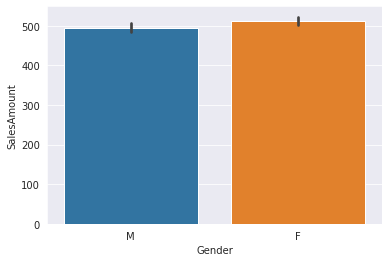

In [ ]:
sns.barplot(x = 'Gender', y = 'SalesAmount',data = df)
df.groupby('Gender')['SalesOrderNumber'].nunique().sort_values(ascending = False)

**Observation** - 

Both Male and Females have placed almost equal number of order and therefore sales amount is also same.

***Total Sales per year ***

Year
2016    21255
2015     3222
2014     2206
Name: SalesOrderNumber, dtype: int64

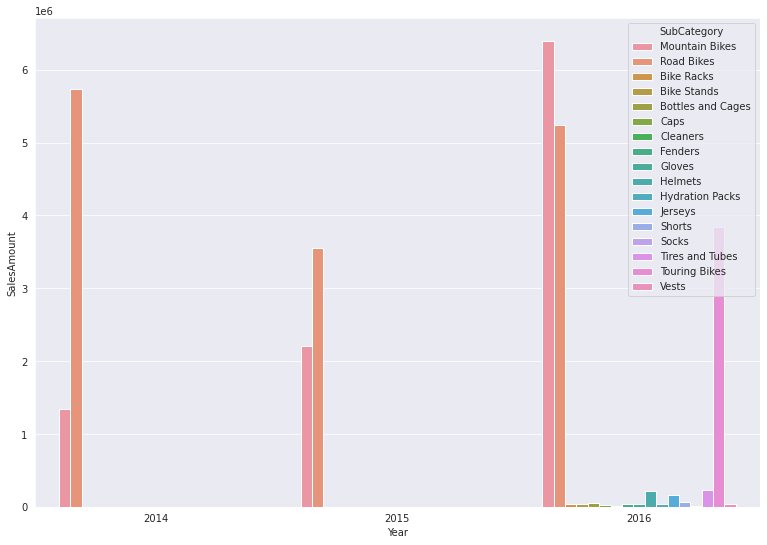

In [ ]:
a = df.groupby(['Year',"SubCategory"])['SalesAmount'].sum().reset_index()
plt.figure(figsize = (13,9))
sns.barplot(x = "Year",y="SalesAmount",hue = "SubCategory",data = a)
df.groupby('Year')['SalesOrderNumber'].nunique().sort_values(ascending = False)

**Observations** - 

It is clear that as number of unique orders being higher for 2016 as compared to 2015 and 2014, total sales amount is the highest for the year 2016 follwed by 2014 and 2015 resp

Increase in the category portfolio has resulted an increase in sales for the year 2016.

***Avg Order Value basis Region***

,Country,Region,Avg_order_value
0,Australia,Australia,1383.640000
1,Canada,Canada,620.500000
2,France,France,1095.200000
3,Germany,Germany,1198.470000
4,United Kingdom,United Kingdom,1149.470000
5,United States,Central,333.430000
6,United States,Northeast,653.250000
7,United States,Northwest,938.310000
8,United States,Southeast,866.060000
9,United States,Southwest,1079.410000


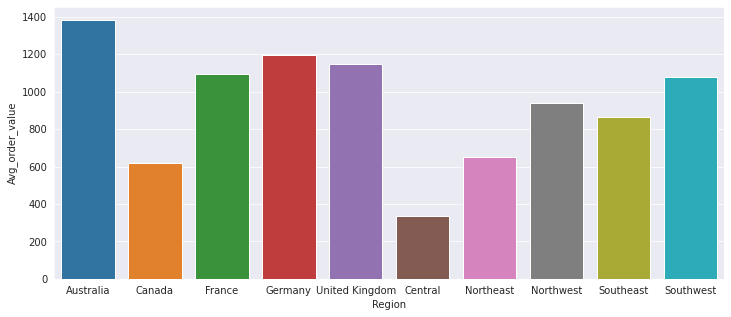

In [ ]:
avg_Order = df.groupby(['Country','Region'])['SalesAmount'].sum().reset_index()
avg_Order1 = df.groupby(['Country','Region'])['SalesOrderNumber'].nunique().reset_index()
avg_Order_df = pd.merge(avg_Order,avg_Order1[["Region","SalesOrderNumber"]],on = "Region",how = "left")
avg_Order_df["Avg_order_value"] = round(avg_Order_df["SalesAmount"] / avg_Order_df["SalesOrderNumber"],2)
plt.figure(figsize=(12,5))
sns.barplot(x = "Region",y = "Avg_order_value",data = avg_Order_df)
avg_Order_df[["Country","Region","Avg_order_value"]].style.set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt'),('border-style','solid'),('border-width','1px')]}])


**Observation** -

Avg Order value in Austrailia and Europian countries is higher than North American countries  

***Profit per region***

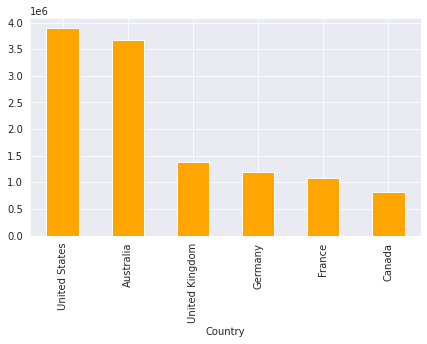

In [ ]:
plt.figure(figsize = (7,4))
df.groupby(["Country"])["Profit"].sum().sort_values(ascending =False).plot(kind = "bar",color = "orange")

**Observation** -

Company has earned most of its profit from US and Austrailia

***Data for Top 10 product by sales per year***

In [ ]:
b = [2014,2015,2016]
for years in b:  
    a = df.loc[df["Year"] == years]
    print(a.groupby(["Year","ProductName"])["SalesAmount"].sum().sort_values(ascending = False)[:10])

Year  ProductName            
2014  Road-150 Red, 48           1205876.99
      Road-150 Red, 62           1202298.72
      Road-150 Red, 52           1080637.54
      Road-150 Red, 56           1055589.65
      Road-150 Red, 44           1005493.87
      Mountain-100 Black, 44      202499.40
      Mountain-100 Silver, 38     197199.42
      Mountain-100 Black, 48      192374.43
      Mountain-100 Silver, 44     166599.51
      Mountain-100 Black, 38      165374.51
Name: SalesAmount, dtype: float64
Year  ProductName            
2015  Mountain-200 Black, 46     411868.7382
      Road-250 Red, 48           395822.7000
      Mountain-200 Black, 42     383181.3634
      Road-250 Red, 58           375228.7500
      Road-250 Black, 52         375228.7500
      Mountain-200 Silver, 46    370784.1084
      Mountain-200 Silver, 38    360427.0104
      Road-250 Red, 44           351842.4000
      Mountain-200 Silver, 42    347998.4928
      Mountain-200 Black, 38     340150.3012
Name: SalesAmoun

**Observation** -

Clearly Mountain Bikes,Road Bikes and touring bikes are the most sold product in each year   

***Category based sales data***

In [ ]:
b = [2014,2015,2016]
for years in b:  
    a = df.loc[df["Year"] == years]
    print(a.groupby(["Year","SubCategory"])["SalesAmount"].sum().sort_values(ascending = False))

Year  SubCategory   
2014  Road Bikes        5.730963e+06
      Mountain Bikes    1.341121e+06
Name: SalesAmount, dtype: float64
Year  SubCategory   
2015  Road Bikes        3.547724e+06
      Mountain Bikes    2.214410e+06
Name: SalesAmount, dtype: float64
Year  SubCategory      
2016  Mountain Bikes       6397228.51
      Road Bikes           5241896.55
      Touring Bikes        3844801.05
      Tires and Tubes       231299.76
      Helmets               215923.29
      Jerseys               165066.21
      Shorts                 67050.42
      Bottles and Cages      55030.81
      Fenders                44267.72
      Hydration Packs        38822.94
      Bike Stands            37842.00
      Bike Racks             36960.00
      Vests                  33464.50
      Gloves                 33379.87
      Caps                   18834.05
      Cleaners                6868.80
      Socks                   4881.57
Name: SalesAmount, dtype: float64


**Observation** -

Category portfolia expantion took place in the year 2016 before which sales was purely based on very limited number of category. 

***Sales analysis based on weekend and weekday***

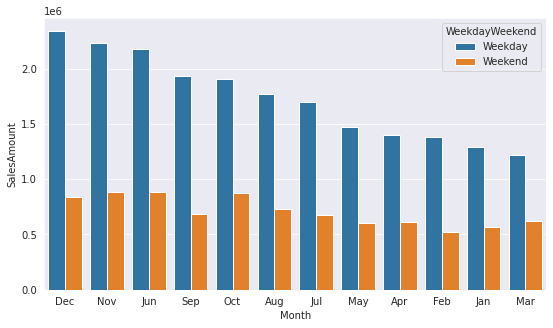

In [ ]:
a1 = df.groupby(['Month',"WeekdayWeekend"])['SalesAmount'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize = (9,5))
sns.barplot(x = "Month",y="SalesAmount",hue = "WeekdayWeekend",data = a1)

**Observation** -

Sales are more on weekday as compared to week-end.
Sales in Dec month is the highest compared to all other months.

***Promotions data analysis***

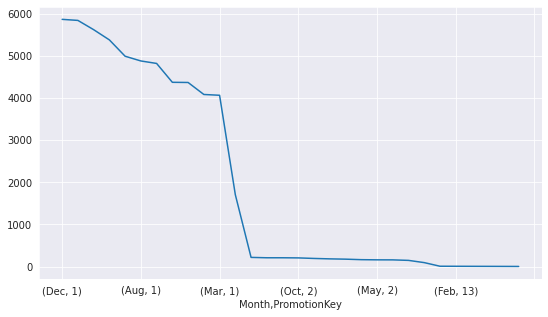

In [ ]:
plt.figure(figsize = (9,5))
df.groupby(["Month","PromotionKey"])["PromotionKey"].count().sort_values(ascending =False).plot()

**Observation** -

Most of the offers on all the products are by the year end

***Sales based on yearly income***

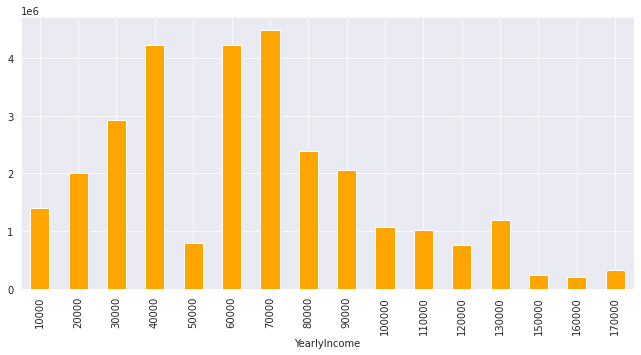

In [ ]:
plt.figure(figsize = (11,5))
df.groupby("YearlyIncome")["SalesAmount"].sum().plot(kind = "bar",color = "orange")

**Observation** -

Looks like People from the middle class income bracket are more intereseted in Riding cycles.

***Sales analysis based on home owner status***

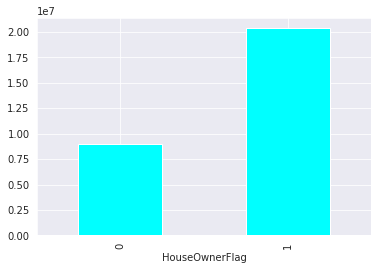

In [ ]:
df.groupby("HouseOwnerFlag")["SalesAmount"].sum().plot(kind = "bar",color = "cyan")

**Observation** -

Clearly majority of the buyer are homeowners 

***Sales analysis based on Occupation and Marital Status***

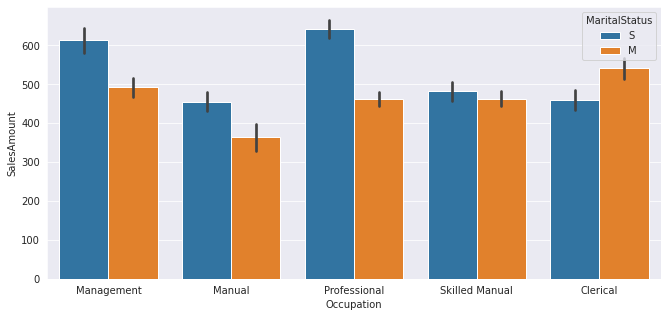

In [ ]:
plt.figure(figsize = (11,5))
sns.barplot(x = "Occupation",y = "SalesAmount",hue = "MaritalStatus",data = df)

**Observation** -

Singles have surpassed married in sales.

Moreover people in Management and Professional Occupation are the top buyers.

***Top 10 products bought by male and females***

In [ ]:
b = ["M","F"]
for Gender in b:  
    a = df.loc[df["Gender"] == Gender]
    print(a.groupby(["Gender","ProductName"])["SalesAmount"].sum().sort_values(ascending = False)[:10])

Gender  ProductName            
M       Mountain-200 Black, 38     694644.2934
        Mountain-200 Silver, 38    672548.5260
        Mountain-200 Black, 46     659317.8400
        Mountain-200 Black, 42     649810.0244
        Road-150 Red, 48           644088.6000
        Mountain-200 Silver, 46    627143.0076
        Road-150 Red, 62           608305.9000
        Mountain-200 Silver, 42    586874.6100
        Road-150 Red, 52           543897.0400
        Road-150 Red, 56           493801.2600
Name: SalesAmount, dtype: float64
Gender  ProductName            
F       Mountain-200 Black, 46     714151.7082
        Mountain-200 Black, 42     713332.0690
        Mountain-200 Silver, 46    673957.0908
        Mountain-200 Silver, 42    670559.9628
        Mountain-200 Silver, 38    666914.2644
        Mountain-200 Black, 38     600221.8478
        Road-150 Red, 62           593992.8200
        Road-150 Red, 48           561788.3900
        Road-150 Red, 56           561788.3900
        R

**Observation** -

Both male and female's have similar choice when it comes to bike selection

In [ ]:
# Using the below file to plot the graph of budget and Sales broken down to Subcategory.
a = df.loc[df["Year"] == 2016]
a.groupby(["Year","SubCategory","Month"])["SalesAmount"].sum().sort_values(ascending = False).reset_index().to_csv("CategorySalesdata.csv")